[ WARN:0@504.653] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/Users/k.sakamoto/Desktop/log/img/image024.jpg'): can't open/read file: check file path/integrity


AttributeError: 'NoneType' object has no attribute 'shape'

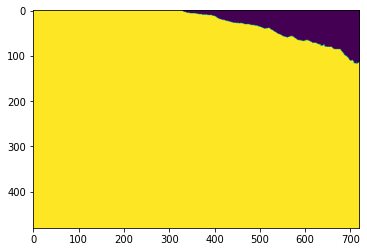

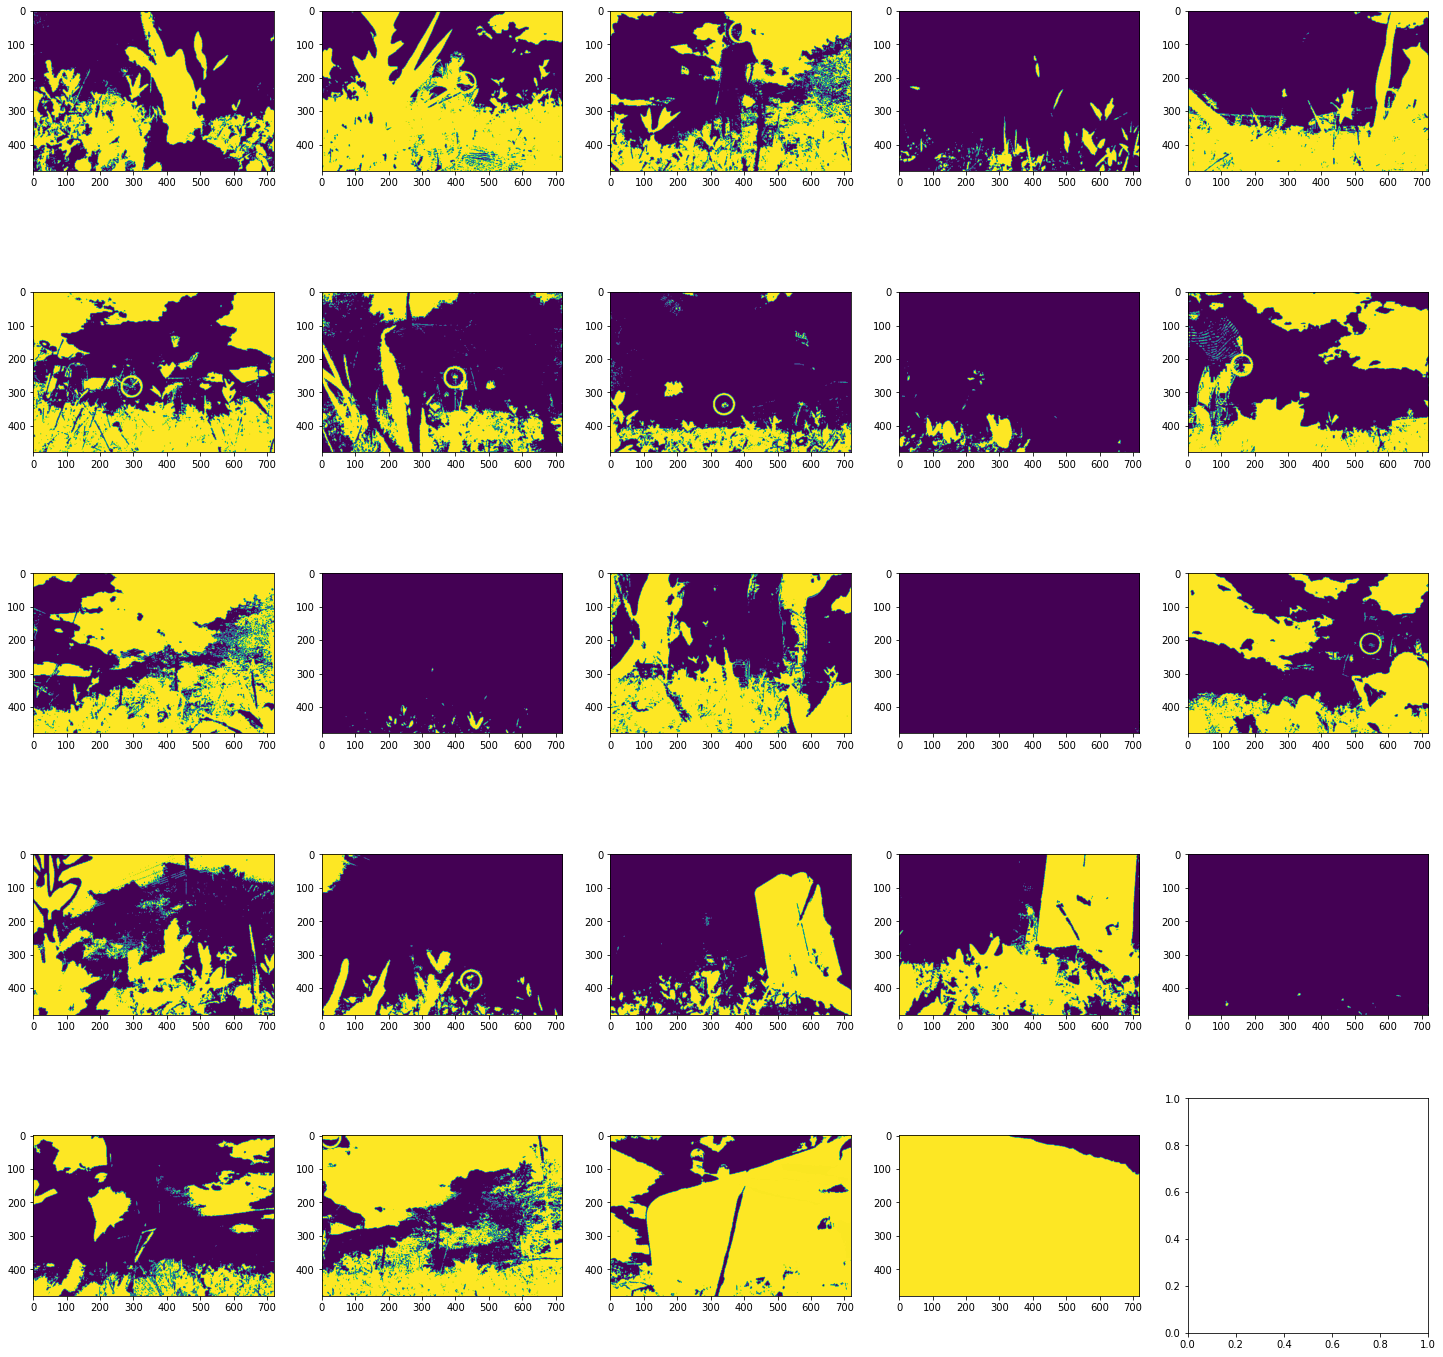

In [11]:
import matplotlib.pyplot as plt
import cv2
import numpy as np


def get_mask(path):

    img = cv2.imread(path) # 画像を読み込む

    height, width = img.shape[:2] # 画像のサイズを取得する

    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) # 色基準で2値化する

    # 色の範囲を指定する
    hsv_min = np.array([0,145,0])
    hsv_max = np.array([5,255,255])
    mask1 = cv2.inRange(hsv, hsv_min, hsv_max)

    # 赤色のHSVの値域2
    hsv_min = np.array([150,110,0]) #カメラ故障のため，0→150へ変更
    hsv_max = np.array([179,255,255])
    mask2 = cv2.inRange(hsv, hsv_min, hsv_max)

    # 指定した色に基づいたマスク画像の生成
    # mask1 = cv2.inRange(hsv, lower_color1, upper_color1)
    mask = mask1 +  mask2

    return mask

mask = get_mask("/Users/k.sakamoto/Desktop/log/img/image023.jpg") #一番コーンが綺麗に写ってる
plt.imshow(mask)

n = 9
fig, ax = plt.subplots(5, 5, figsize=(25,25)) #nを変えて写真の枚数に合わせる。今回は9*9=81枚
ax = ax.ravel()
for i, a in enumerate(ax):
    a.imshow(get_mask("/Users/k.sakamoto/Desktop/log/img/image{:>03d}.jpg".format(i))) #いっぱい写真が入っているフォルダ
plt.show()

In [10]:
def detect_center(file_path):
    img = cv2.imread(file_path) # 画像を読み込む
    
    height, width = img.shape[:2] # 画像のサイズを取得する

    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) # 色基準で2値化する

    # 色の範囲を指定する
    hsv_min = np.array([0,145,0])
    hsv_max = np.array([5,255,255])
    mask1 = cv2.inRange(hsv, hsv_min, hsv_max)

    # 赤色のHSVの値域2
    hsv_min = np.array([0,110,0]) #カメラ故障のため，0→150へ変更
    hsv_max = np.array([179,255,255])
    mask2 = cv2.inRange(hsv, hsv_min, hsv_max)

    mask = mask1 + mask2

    # 非ゼロのピクセルが連続してできた領域を検出する
    nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(mask)

    #　画像の背景の番号は 0 とラベリングされているので、実際のオブジェクトの数は nlabels - 1 となる
    nlabels = nlabels - 1
    labels = np.delete(labels, obj=0, axis=0)
    stats = np.delete(stats, obj=0, axis=0)
    centroids = np.delete(centroids, obj=0, axis=0)
    centroids[:,0] = (width/2 - centroids[:,0]) / width*2
    centroids[:,1] = (height/2 - centroids[:,1]) / height*2
    percent = stats[:,4] / (height*width)
    
    res = {}
    if nlabels == 0:
        res['height'] = None
        res['width'] = None
        res['percent'] = 0
        res['center'] = None
    else:
        max_index = np.argmax(percent)
        res['height'] = height
        res['width'] = width
        res['percent'] = percent[max_index]
        res['center'] = centroids[max_index]
        #self.save_detected_img(file_path, img, ((1-res['center'][0])*width/2, (1-res['center'][1])*height/2))
    
    return res

res = detect_center("/Users/k.sakamoto/Desktop/log/img/image022.jpg")
res

{'height': 480,
 'width': 720,
 'percent': 0.6676128472222222,
 'center': array([-0.19760579, -0.19105725])}